In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
seed(2022)

# Test function

In [ ]:
import project1; import importlib; importlib.reload(project1); from project1.project1 import make_design_matrix
N=5
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec  = np.array([x, y])
X = make_design_matrix(xvec, p=3)

In [ ]:
from itertools import combinations_with_replacement
N=5
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec  = np.array([x, y])
xi = {"x%i"%i : xvec[i].ravel() for i in range(len(xvec))}
keys = [key for key in xi.keys()]
comb = []
p = 2
for p in range(1,p+1):
    comb += [x for x in combinations_with_replacement(keys, p )]
print(comb)
X = make_design_matrix(xvec, p=2)
print(X)

In [ ]:
def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X

x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
X_lecturer = create_X(x = x, y = y, n = 2)
np.sum(X_lecturer == X) == len(X.ravel())

In [ ]:
print(X_lecturer)
X_lecturer[:,1:]

In [ ]:
X_lecturer.shape

In [ ]:
np.mean(X_lecturer, axis=1).shape

In [ ]:
X_lecturer[:,1] - np.mean(X_lecturer[:,1])

# Time for generating design matrices

In [ ]:
import time
model_complexity = 5
xvec = np.array([x,y])
for p in range(1,model_complexity+1):

    tik = time.time()
    X = make_design_matrix(xvec = xvec, p = p)
    #X = create_X(x = x1, y=y1, n = p)
    tok = time.time()
    print(tok-tik)

In [ ]:
import time
model_complexity = 5
xvec = np.array([x1,y1])
for p in range(1,model_complexity+1):
    tik = time.time()
    #X = make_design_matrix(xvec = xvec, p = p)
    X = create_X(x = x, y=y, n = p)
    tok = time.time()
    print(tok-tik)

# Simple 1D test case

In [ ]:
#%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x = np.arange(0,1,0.05)
def test_func(**kwargs):
    x = kwargs['x0']
    return 5*x**2 + x

xvec  = np.array([x])
X = make_design_matrix(xvec = xvec, p = 5)
z = test_func(**{'x0':x})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = np.array([[x] for x in znoisy - np.mean(znoisy)])
A = np.linalg.pinv(X.T@X)@X.T
betahat = A@znoisy_centered
znoisy_tilde = X@betahat
plt.plot(x, znoisy_centered, linestyle = 'dashed')
plt.plot(x, znoisy_tilde)

In [ ]:
#%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x = np.arange(0,1,0.05)
xvec = np.array([x])
z = test_func(**{'x0':x})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = znoisy - np.mean(znoisy)
X = make_design_matrix(xvec = xvec, p = 5)
znoisy_tilde, betahat = ols_fp_wo_split(X = X, y = znoisy_centered)
plt.plot(x, znoisy_centered, linestyle = 'dashed')
plt.plot(x, znoisy_tilde)


In [ ]:
%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x, y = np.arange(0,1,0.1), np.arange(0,1,0.1)
x, y = np.meshgrid(x,y)
def test_func_2(**kwargs):
    x = kwargs['x0']
    y = kwargs['x1']
    return 5*x**2 + x + 5*y**2 + y + np.exp(-x**2) +np.exp(-x*y) + np.exp(-y) 
xvec = np.array([x, y])
X = make_design_matrix(xvec = xvec, p = 5)
z = test_func_2(**{'x%i'%i: xvec[i] for i in range(len(xvec))})

noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = znoisy - np.mean(znoisy)
znoisy_tilde, betahat = ols_fp_wo_split(X = X, y = znoisy_centered.ravel())
znoisy_tilde = znoisy_tilde.reshape(x.shape)
znoisy = znoisy.reshape(x.shape)


fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,znoisy_tilde + np.mean(znoisy), cmap=cm.viridis)
ax.plot_surface(x,y,z, cmap=cm.coolwarm)

# b)

In [ ]:
%matplotlib inline
import importlib; import project1; importlib.reload(project1)
from project1.project1 import *
N = 100
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec = np.array([x,y])
z = FrankeFunction(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = znoisy - np.mean(znoisy)
for p in range(1,5):
    X = make_design_matrix(xvec = xvec, p = p)
    znoisy_tilde, betahat = ols_fp_wo_split(X = X, y = znoisy_centered.ravel())
znoisy_tilde = (znoisy_tilde + np.mean(znoisy)).reshape(x.shape)

fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,znoisy_tilde, cmap=cm.viridis)
ax.plot_surface(x,y,znoisy, cmap=cm.coolwarm)
ax.view_init(20,45)

In [ ]:
%matplotlib inline
import os
import importlib; import project1; importlib.reload(project1)
from project1.project1 import *
from sklearn.preprocessing import MinMaxScaler, Normalizer, RobustScaler
test_size = 0.2
scale = True
plot_betas = False
maxdeg = 10
        
for scaler in ['standard', 'minmax', 'normalizer', 'robust']:
    for N in [50,100, 500, 1000]:
        x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
        xvec = np.array([x,y])
        
        mses_train = np.zeros((maxdeg))
        mses_test = np.zeros((maxdeg))
        Rs_train = np.zeros((maxdeg))
        Rs_test = np.zeros((maxdeg))

        betas = []
        z = FrankeFunction(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
        noise = np.random.normal(0,1,size=z.shape)
        znoisy = z + noise
        for p in range(1,maxdeg+1):
            print(p)
            #X = make_design_matrix(xvec = xvec, p = p)
            X = create_X(x = xvec[0].ravel(), y = xvec[1].ravel(), n = p)

            Xtrain, Xtest, znoisy_train, znoisy_test = train_test_split(X, znoisy.ravel(), 
                                                                        **{'random_state' : 3155, 'test_size':test_size})
            if scale:
                if scaler == "standard":
                    Xtest = (Xtest[:,1:] - np.mean(Xtrain[:,1:],axis=0))/np.std(Xtrain[:,1:],axis=0)
                    Xtrain = scale_center_X(X  = Xtrain[:,1:])
                if scaler == "minmax":
                    SL_scaler = MinMaxScaler()
                    SL_scaler.fit(Xtrain)
                    Xtrain = SL_scaler.transform(Xtrain)
                    Xtest = SL_scaler.transform(Xtest)
                if scaler == "normalizer":
                    SL_scaler = Normalizer()
                    SL_scaler.fit(Xtrain)
                    Xtrain = SL_scaler.transform(Xtrain)
                    Xtest = SL_scaler.transform(Xtest)
                if scaler == "robust":
                    SL_scaler = RobustScaler()
                    SL_scaler.fit(Xtrain)
                    Xtrain = SL_scaler.transform(Xtrain)
                    Xtest = SL_scaler.transform(Xtest)
            if not scale:
                scaler = "no scaling "
            ztilde_train, betahat = ols_fp_wo_split(X = Xtrain, y = (znoisy_train-np.mean(znoisy_train)))
            ztilde_train = ztilde_train + np.mean(znoisy_train)
            ztilde_test =  Xtest@betahat + np.mean(znoisy_train)
            betas.append(betahat)

            mses_train[p-1] = MSE(y = znoisy_train,ytilde = ztilde_train)
            mses_test[p-1] = MSE(y = znoisy_test,ytilde = ztilde_test )
            Rs_train[p-1] = Rscore(y = znoisy_train, ytilde = ztilde_train)
            Rs_test[p-1] = Rscore(y = znoisy_test, ytilde = ztilde_test)
        if plot_betas:
            beta_matrix = np.ones((maxdeg, len(betas[-1])))*np.nan
            fig_betas, ax_betas = plt.subplots(figsize=(10,10))
            for i in range(maxdeg):
                for j in range(len(betas[i])):
                    beta_matrix[i,j] = betas[i][j]
            [ax_betas.plot(np.arange(maxdeg) + 1, beta_matrix[:,i], label="$\\beta%i$"%i) for i in range(beta_matrix.shape[-1])]
            ax_betas.set_ylabel("$\\beta$")
            ax_betas.set_xlabel("Polynomial degree $p$")
            ax_betas.legend(ncol = 2, bbox_to_anchor=(1,.5,.15,.5))
            ax_betas.set_xticks(np.arange(maxdeg) + 1,np.arange(maxdeg) + 1)

        fig, axs = plt.subplots(1,2, figsize=(10,5))
        polydeg = np.arange(maxdeg)+1
        fig.suptitle("%s $N=%i$, testsize $%.1f$ percent"%(scaler,N, test_size*100))
        axs[0].plot(polydeg, mses_train, ls="--", marker='o', label="Train")
        axs[0].plot(polydeg, mses_test, marker='o', label="Test")
        axs[0].set_ylabel("MSE")
        axs[1].plot(polydeg, Rs_train, marker='o', ls = "--", label = "Train")
        axs[1].plot(polydeg, Rs_test, marker='o', label = "Test")

        axs[1].set_ylabel("$R^2$ score")
        [ax.set_xlabel("Polynomial degree $p$") for ax in axs]
        [ax.set_xticks(polydeg, polydeg) for ax in axs]
        [ax.legend() for ax in axs]
        fig.tight_layout()
        fig.savefig(os.getcwd() + "/figs/partB/%s_N%i_OLS_franke_testsize_%i.png"%(scaler, N,int(test_size*100)), dpi=150)

In [ ]:
from sklearn.metrics import r2_score
r2_own = Rscore(y = znoisy_test, ytilde = ztilde_test)
r2_SL = r2_score(y_true=znoisy_test, y_pred=ztilde_test)
print(r2_own == r2_SL)

In [ ]:
%matplotlib inline
beta_matrix = np.ones((maxdeg, len(betas[-1])))*np.nan
plt.figure(figsize=(10,10))
for i in range(maxdeg):
    for j in range(len(betas[i])):
        beta_matrix[i,j] = betas[i][j]
[plt.plot(np.arange(maxdeg) + 1, beta_matrix[:,i], label="$\\beta%i$"%i) for i in range(beta_matrix.shape[-1])]
plt.ylabel("$\\beta$")
plt.xlabel("Polynomial degree $p$")
plt.legend(ncol = 2, bbox_to_anchor=(1,.5,.15,.5))
plt.xticks(np.arange(maxdeg) + 1,np.arange(maxdeg) + 1)

# c)

To plot surface data retrieve the indices from the uniqueness of the xy-coordinates.

In [ ]:
%matplotlib inline
from sklearn.model_selection import train_test_split
x, y = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
xvec = np.array([x,y])
X = make_design_matrix(xvec = xvec, p = 4)
z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,.1,size=z.shape)
znoisy = z + noise
ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                          **{"test_size" : 0.25, 
                                                                                             "random_state" : 42})
xtrain = Xtrain[:,1]
ytrain = Xtrain[:,2]
shape_train = (x.shape[0], len(ytrain)//x.shape[0])
xtest = Xtest[:,1]
ytest = Xtest[:,2]
shape_test = (x.shape[0], len(ytest)//x.shape[0])

fig, axs = plt.subplots(2,2,subplot_kw={'projection':'3d'}, figsize=(10,10))
axs[0,0].scatter(xtrain, ytrain, ztilde_train, c=ztilde_train, cmap=cm.viridis)
#axs[0].scatter(xtrain, ytrain, ztrain, c=ztrain, cmap=cm.coolwarm)
axs[0,1].scatter(xtrain, ytrain, np.mean(z)+ztrain-ztilde_train, c=np.mean(z)+ztrain-ztilde_train, cmap=cm.coolwarm)

axs[1,0].scatter(xtest, ytest, ztilde_test, c=ztilde_test, cmap=cm.viridis)
#axs[1].scatter(xtest, ytest, ztest, c=ztest, cmap=cm.coolwarm)
axs[1,1].scatter(xtest, ytest, ztest + np.mean(z)-ztilde_test, c=np.mean(z)+ztest-ztilde_test, cmap=cm.coolwarm)
[ax.view_init(15,45) for ax in axs.ravel()]

# Bias-variance trade-off

### 1D test case


In [ ]:
def test_func_exp(**kwargs):
    x = kwargs['x0']
    return np.exp(x -x**2) + 5*x**2 + x

In [ ]:
import numpy as np
np.random.seed(2022)
import importlib; import project1; importlib.reload(project1)
from project1.project1 import *
model_complexity = 20
mses_train, Rs_train = np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test = np.zeros((model_complexity)), np.zeros((model_complexity))
x = np.arange(0,1,0.01)
xvec = np.array([x])
z = test_func_exp(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.3, 
                                                                                                "random_state" : 42})
    mses_train[p-1] = MSE(y = ztrain,ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain, ytilde = ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest,ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest, ytilde = ztilde_test)
    
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.legend()
plt.ylabel("log10 MSE")
plt.xlabel("Polynomial degree")
plt.xticks(np.arange(model_complexity)[::2]+1,np.arange(20)[::2]+1)

## 2D Test case

In [ ]:
def test_func_2(**kwargs):
    x = kwargs['x0']
    y = kwargs['x1']
    return np.exp(x -(x+y)**2) + 5*x**2 + x*y

model_complexity = 10
mses_train, Rs_train = np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test = np.zeros((model_complexity)), np.zeros((model_complexity))
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
z = test_func_2(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.3, 
                                                                                                "random_state" : 42})
    mses_train[p-1] = MSE(y = ztrain,ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain, ytilde = ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest,ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest, ytilde = ztilde_test)
# plot log10(MSE) wrt to the polynomial degree
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.legend()
plt.ylabel("log10 MSE")
plt.xlabel("Polynomial degree")
plt.xticks(np.arange(model_complexity)[::2]+1,np.arange(model_complexity)[::2]+1)

# Bias-variance trade-off Franke function

### Lecturers example of bias

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 40
n_boostraps = 100
maxdegree = 14


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()

In [ ]:
y_pred.shape

## No resampling

In [ ]:
model_complexity = 20
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
mses_train, Rs_train, bias_train, variance_train = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test, bias_test, variance_test = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity)), np.zeros((model_complexity))

z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.3, 
                                                                                                "random_state" : 42})
    
    mses_train[p-1] = MSE(y = ztrain,ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain, ytilde = ztilde_train)
    bias_train[p-1] = np.mean((ztrain-np.mean(ztilde_train))**2)
    variance_train[p-1] = np.var(ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest,ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest, ytilde = ztilde_test)
    bias_test[p-1] = np.mean((ztest-np.mean(ztilde_test))**2)
    variance_test[p-1] = np.var(ztilde_test)

# plot log10(MSE) wrt polynomial degrees
ps = [i for i in range(1,model_complexity+1)]
#plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
#plt.plot(ps, np.log10(bias_train), label="Bias train")
plt.plot(ps, np.log10(bias_test), label="Bias test")
#plt.plot(ps, np.log10(variance_train), label="Var train")
plt.plot(ps, np.log10(variance_test), label="Var test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

# Bootstrap

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Text(0.5, 0, 'Polynomial degree')

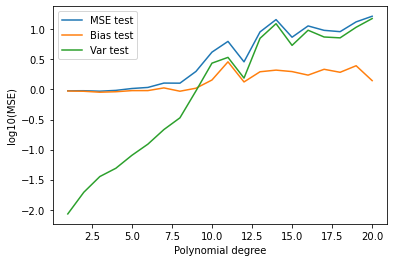

In [4]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
np.random.seed(3155)
model_complexity = 20
N = 20
k = 20
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec = np.array([x,y])
mses_train, Rs_train, bias_train, variance_train = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test, bias_test, variance_test = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity)), np.zeros((model_complexity))

z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise

for p in range(1,model_complexity+1):
    print(p)
    X = make_design_matrix(xvec = xvec, p = p)
    Xtrain, Xtest, ztrain,ztest = train_test_split(X, znoisy,**{"test_size" : 0.2, "random_state" : 3155})
    ztilde_train = np.zeros(tuple(list(ztrain.shape) + [k]))
    ztilde_test = np.zeros(tuple(list(ztest.shape) + [k]))
    for ik in range(k):
        z_resampled, X_resampled = resample(data = ztrain, design_matrix = Xtrain)
        ztilde_train[:,ik], betahat = ols_fp_wo_split(X=X_resampled, y=z_resampled)
        ztilde_test[:,ik] = Xtest@betahat
        Rs_train[p-1] = Rscore(y = z_resampled, ytilde = ztilde_train[:,ik])
        Rs_test[p-1] = Rscore(y = ztest, ytilde = ztilde_test[:,ik])
        
    mses_train[p-1] = MSE(y = ztrain, ytilde = ztilde_train)
    variance_train[p-1] = np.mean(np.var(ztilde_train, axis = 1))

    mses_test[p-1] = MSE(y = ztest,ytilde = ztilde_test)
    variance_test[p-1] = np.mean(np.var(ztilde_test, axis=1))
        
    bias_train[p-1] = exp_bias(y = ztrain, exp_ytilde = np.mean(ztilde_train, axis=1))
    bias_test[p-1] = exp_bias(y = ztest, exp_ytilde = np.mean(ztilde_test, axis=1))

    
        
# plot log10(MSE) wrt polynomial degrees
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.plot(ps, np.log10(bias_test), label="Bias test")
plt.plot(ps, np.log10(variance_test), label="Var test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

# d) cross validation

## Franke function

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Text(0.5, 0, 'Polynomial degree')

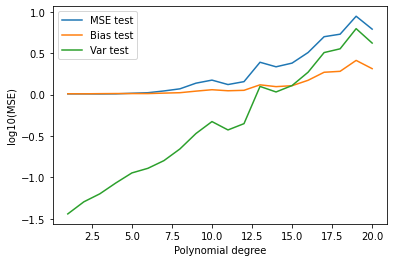

In [7]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
np.random.seed(3155)
# perform the kfolding
k = 5
splits = kfold(data=znoisy, k=k, random_state = 3155)

mses_train, var_train, bias_train = np.zeros((model_complexity)), np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, var_test, bias_test = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity))
for p in range(1,model_complexity+1):
    print(p)
    ztrain, ztest, ztilde_train, ztilde_test = cross_validation(data = znoisy, splits = splits, xvec = np.array([x, y]), k = k, p = p, method = "ols", scale_centering=True)
    mses_train[p-1] = np.nanmean((ztrain - ztilde_train)**2)
    bias_train[p-1] = np.nanmean((ztrain - np.nanmean(ztilde_train, axis=1, keepdims=True))**2)
    var_train[p-1] = np.nanmean(np.nanvar(ztilde_train, axis=1))

    mses_test[p-1] = np.nanmean((ztest - ztilde_test)**2)
    bias_test[p-1] = np.nanmean((ztest - np.nanmean(ztilde_test, axis=1, keepdims=True))**2)
    var_test[p-1] = np.nanmean(np.nanvar(ztilde_test, axis=1))
# plot log10(MSE) wrt polynomial degree
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.plot(ps, np.log10(bias_test), label="Bias test")
plt.plot(ps, np.log10(var_test), label="Var test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

### Ridge comparison $\lambda = 0$
- should give similar features as the OLS
    - but bias is tending to increase with the polynomial degree...

Text(0.5, 0, 'Polynomial degree')

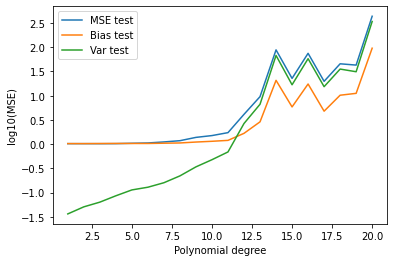

In [8]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
mses_train, var_train, bias_train = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity))
mses_test, var_test, bias_test = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity))
for p in range(1,model_complexity+1):
    ztrain, ztest, ztilde_train, ztilde_test = cross_validation(data = znoisy, 
                                                                splits = splits, 
                                                                xvec = np.array([x, y]), 
                                                                k = k, p = p, 
                                                                method = "ridge", 
                                                                lmbda = 0, 
                                                                sscale_centering=True)
    mses_train[p-1] = np.nanmean((ztrain - ztilde_train)**2)
    bias_train[p-1] = np.nanmean((ztrain - np.nanmean(ztilde_train, axis=1, keepdims=True))**2)
    var_train[p-1] = np.nanmean(np.nanvar(ztilde_train, axis=1))

    mses_test[p-1] = np.nanmean((ztest - ztilde_test)**2)
    bias_test[p-1] = np.nanmean((ztest - np.nanmean(ztilde_test, axis=1, keepdims=True))**2)
    var_test[p-1] = np.nanmean(np.nanvar(ztilde_test, axis=1))
# plot log10(MSE) wrt polynomial degree
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.plot(ps, np.log10(bias_test), label="Bias test")
plt.plot(ps, np.log10(var_test), label="Var test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

# e) Ridge with CV and bootstrap
- Bias-variance trade-off
- MSE and R2-score
- study dependence on $\lambda$

## CV
- check: for $\lambda = 0$ do I get the same as the OLS

## Simple test case

In [9]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *

# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

# Generate the data.
nsamples = 50
x = np.random.randn(nsamples)
y = 3*x**2 + np.random.randn(nsamples)
p = 6
k = 5
# Decide which values of lambda to use
nlambdas = 500
lambdas = np.logspace(-3, 5, nlambdas)
mses_train, var_train, bias_train = np.zeros((len(lambdas))), np.zeros((len(lambdas))),np.zeros((len(lambdas)))
mses_test, var_test, bias_test = np.zeros((len(lambdas))), np.zeros((len(lambdas))),np.zeros((len(lambdas)))
splits = kfold(data=y, k=k, random_state = 3155)
for i in range(len(lambdas)):
    ztrain, ztest, ztilde_train, ztilde_test = cross_validation(data = y, splits = splits, xvec = np.array([x]), k = k, p = p, method = "ridge", lmbda = lambdas[i], scale_centering=True)
    mses_train[i] = np.nanmean((ztrain - ztilde_train)**2)
    bias_train[i] = np.nanmean((ztrain - np.nanmean(ztilde_train, axis=1, keepdims=True))**2)
    var_train[i] = np.nanmean(np.var(ztilde_train, axis=1))

    mses_test[i] = np.nanmean((ztest - ztilde_test)**2)
    bias_test[i] = np.nanmean((ztest - np.mean(ztilde_test, axis=1, keepdims=True))**2)
    var_test[i] = np.nanmean(np.var(ztilde_test, axis=1))

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
# Initialize a KFold instance
k = 5
kfold = KFold(n_splits = k, random_state=3155, shuffle=True)
poly = PolynomialFeatures(degree = p)
estimated_mse_sklearn = np.zeros(nlambdas)
i = 0
for lmb in lambdas:
    # generate model
    ridge = Ridge(alpha = lmb)
    # make design matrix
    X_SL = poly.fit_transform(x[:, np.newaxis])
    # scale design matrix
    X_SL_scaled = scale_center_X(X = X_SL[:,1:])
    # perform cross-validation
    estimated_mse_folds = cross_val_score(ridge, X_SL_scaled, y[:, np.newaxis]-np.mean(y[:, np.newaxis]), 
                                          scoring='neg_mean_squared_error', cv=kfold)
    # store mse values
    estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)

    i += 1

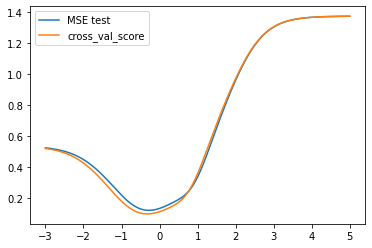

In [11]:
plt.plot(np.log10(lambdas), np.log10(mses_test), label="MSE test")
plt.plot(np.log10(lambdas), np.log10(estimated_mse_sklearn), label = 'cross_val_score')
plt.legend()

## Franke function

In [40]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
N = 20
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec = np.array([x,y])
z = FrankeFunction(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
model_complexity = 20
k = 5
splits = kfold(data=znoisy, k=k, random_state = 3155)

lambdas = np.array([0]+list(np.logspace(-5,5,10)))
ll = len(lambdas)
mses_train, bias_train, var_train = np.zeros((model_complexity, len(lambdas))),np.zeros((model_complexity, len(lambdas))),np.zeros((model_complexity, len(lambdas)))
mses_test, bias_test, var_test = np.zeros((model_complexity, len(lambdas))),np.zeros((model_complexity, len(lambdas))),np.zeros((model_complexity, len(lambdas)))
for p in range(1, model_complexity+1):
    print(p)
    #X = make_design_matrix(xvec = xvec, p = p)
    X = create_X(x = xvec[0].ravel(), y = xvec[1].ravel(), n = p)
    
    for i in range(len(lambdas)):
        #print(lambdas[i])
        ztrain, ztest, ztilde_train, ztilde_test = cross_validation(data = znoisy, 
                                                                    splits = splits, 
                                                                    xvec = xvec, 
                                                                    k = k, p = p, 
                                                                    method = "ridge", 
                                                                    lmbda = lambdas[i])
        #computing the metrics
        mses_train[p-1,i] = np.nanmean((ztrain - ztilde_train)**2)
        bias_train[p-1,i] = np.nanmean((ztrain - np.nanmean(ztilde_train, axis=1, keepdims=True))**2)
        var_train[p-1,i] = np.nanmean(np.var(ztilde_train, axis=1))
        
        mses_test[p-1,i] = np.nanmean((ztest - ztilde_test)**2)
        bias_test[p-1,i] = np.nanmean((ztest - np.nanmean(ztilde_test, axis=1, keepdims=True))**2)
        var_test[p-1,i] = np.nanmean(np.nanvar(ztilde_test, axis=1))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


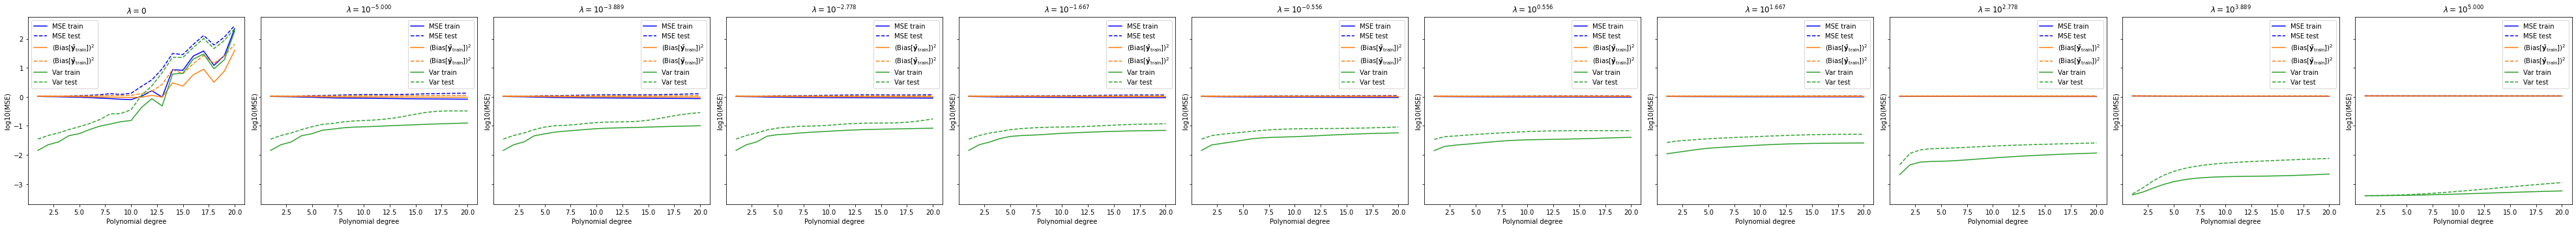

In [41]:
fig, axs = plt.subplots(1,len(lambdas), figsize=(len(lambdas)*5,5), sharey=True)

ps = np.arange(model_complexity)+1

for i in range(len(lambdas)):
    if lambdas[i] == 0:
        axs[i].set_title("$\\lambda = 0$")
    else:    
        axs[i].set_title("$\\lambda = 10^{%.3f}$"%np.log10(lambdas[i]))
    axs[i].plot(ps, np.log10(mses_train[:,i]),  label="MSE train", color = 'b')
    axs[i].plot(ps, np.log10(mses_test[:,i]),  label="MSE test",  color = 'b', ls='--')
    axs[i].plot(ps, np.log10(bias_train[:,i]),  label="(Bias[$\\tilde{\mathbf{y}}_\mathrm{train}$]$)^{2}$",color = 'C1')
    axs[i].plot(ps, np.log10(bias_test[:,i]),  label="(Bias[$\\tilde{\mathbf{y}}_\mathrm{train}$]$)^{2}$", color = 'C1', ls='--')
    axs[i].plot(ps, np.log10(var_train[:,i]),  label="Var train", color = 'C2')
    axs[i].plot(ps, np.log10(var_test[:,i]),  label="Var test",  color = 'C2', ls='--')
[ax.set_ylabel("log10(MSE)") for ax in axs]
[ax.set_xlabel("Polynomial degree") for ax in axs]
[ax.legend() for ax in axs]
fig.tight_layout()

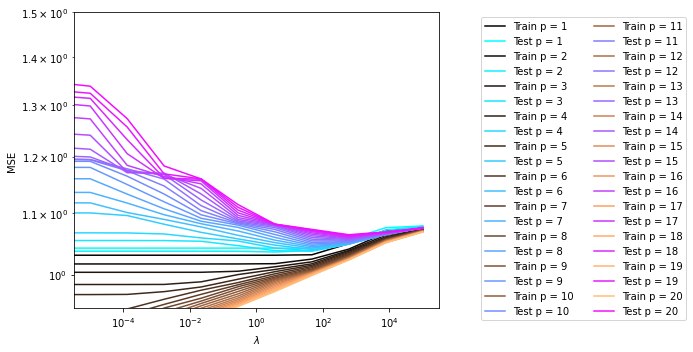

In [42]:
carr = np.arange(mses_train.shape[0])/mses_train.shape[0]
cs_train = plt.cm.copper(carr)
cs_test = plt.cm.cool(carr)
fig, ax = plt.subplots(1,1, figsize=(10,5))
for ip in range(mses_train.
                shape[0]):
    ax.plot(lambdas, mses_train[ip], color = cs_train[ip], label="Train p = %i"%(ip+1))
    ax.plot(lambdas, mses_test[ip], color = cs_test[ip], label="Test p = %i"%(ip+1))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(.95,1.5)
ax.set_ylabel("MSE")
ax.set_xlabel("$\\lambda$")
ax.legend(bbox_to_anchor=(1.1,.9,0,.1), ncol=2)
fig.tight_layout()

## with bootstrapping

In [43]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 20
k = 100
mses_train, var_train, bias_train = np.zeros((model_complexity, ll)), np.zeros((model_complexity, ll)),np.zeros((model_complexity, ll)) 
mses_test, var_test, bias_test = np.zeros((model_complexity, ll)), np.zeros((model_complexity, ll)),np.zeros((model_complexity, ll))
for p in range(1,model_complexity+1):
    print(p)
    X = make_design_matrix(xvec = xvec, p = p)[:,1:]
    
    Xtrain, Xtest, ztrain, ztest = train_test_split(X, znoisy.ravel())
    mean_Xtrain = np.mean(Xtrain,axis=0)
    std_Xtrain = np.std(Xtrain, axis=0)
    Xtest_scaled = (Xtest  - mean_Xtrain)/std_Xtrain
    ztilde_train = np.zeros(tuple(list(ztrain.shape) + [len(lambdas),k]))
    ztilde_test = np.zeros(tuple(list(ztest.shape) + [len(lambdas),k]))
    
    for ik in range(k):
        z_resampled, Xtrain_resampled = resample(data = ztrain, design_matrix=Xtrain)
        for i in range(len(lambdas)):
            ztilde_train[:,i,ik], betahat = ridge_fp_wo_split(X=Xtrain_resampled, y=z_resampled-np.mean(z_resampled), lmbda = lambdas[i])
            ztilde_train[:,i,ik] += np.mean(z_resampled)
            ztilde_test[:,i,ik] = Xtest_scaled@betahat + np.mean(z_resampled)
    
    # compute mse, bias and variances
    for i in range(len(lambdas)):
        mses_train[p-1, i] = MSE(y = ztrain ,ytilde = ztilde_train[:,i])
        bias_train[p-1, i] = exp_bias(ztrain, exp_ytilde = np.mean(ztilde_train[:,i], axis=1))
        var_train[p-1, i] = np.mean(np.var(ztilde_train[:,i], axis=1))

        mses_test[p-1, i] = MSE(y = ztest ,ytilde = ztilde_test[:,i])
        bias_test[p-1, i] = exp_bias(ztest, exp_ytilde = np.mean(ztilde_test[:,i], axis=1))
        var_test[p-1, i] = np.mean(np.var(ztilde_test[:,i], axis=1))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


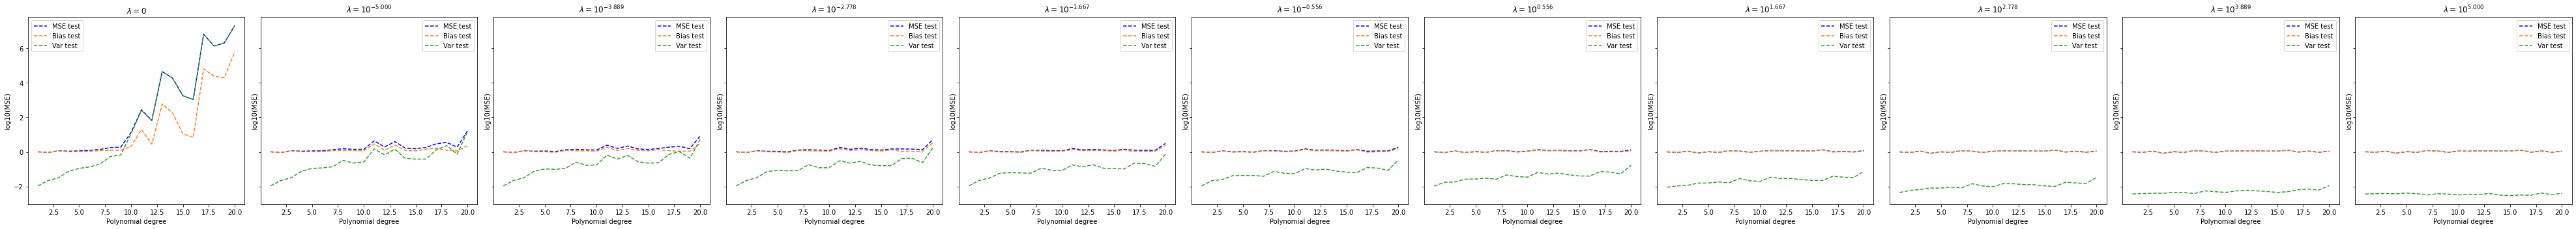

In [44]:
fig, axs = plt.subplots(1,len(lambdas), figsize=(len(lambdas)*5,5), sharey=True)

ps = np.arange(model_complexity)+1

for i in range(len(lambdas)):
    if lambdas[i] == 0:
        axs[i].set_title("$\\lambda = 0$")
    else:    
        axs[i].set_title("$\\lambda = 10^{%.3f}$"%np.log10(lambdas[i]))
    axs[i].plot(ps, np.log10(mses_test[:,i]),  label="MSE test",  color = 'b', ls='--')
    axs[i].plot(ps, np.log10(bias_test[:,i]),  label="Bias test", color = 'C1', ls='--')
    axs[i].plot(ps, np.log10(var_test[:,i]),  label="Var test",  color = 'C2', ls='--')
[ax.set_ylabel("log10(MSE)") for ax in axs]
[ax.set_xlabel("Polynomial degree") for ax in axs]
[ax.legend() for ax in axs]
fig.tight_layout()

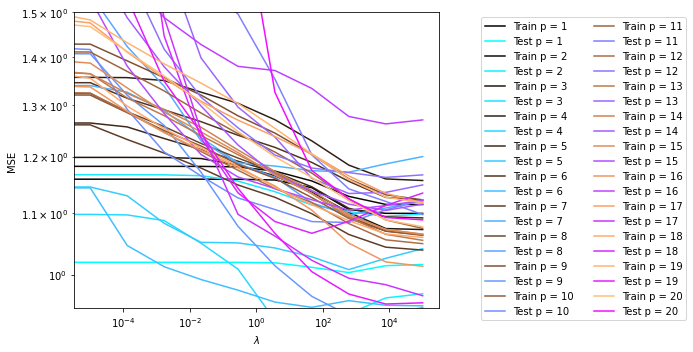

In [45]:
carr = np.arange(mses_train.shape[0])/mses_train.shape[0]
cs_train = plt.cm.copper(carr)
cs_test = plt.cm.cool(carr)
fig, ax = plt.subplots(1,1, figsize=(10,5))
for ip in range(mses_train.shape[0]):
    ax.plot(lambdas, mses_train[ip], color = cs_train[ip], label="Train p = %i"%(ip+1))
    ax.plot(lambdas, mses_test[ip], color = cs_test[ip], label="Test p = %i"%(ip+1))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(.95,1.5)
ax.set_ylabel("MSE")
ax.set_xlabel("$\\lambda$")
ax.legend(bbox_to_anchor=(1.1,.9,0,.1), ncol=2)
fig.tight_layout()

# f) Lasso

## Test case

### UiO example

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import importlib; import project1; importlib.reload(project1); from project1.project1 import *


def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

X = np.array( [ [ 2, 0], [0, 1], [0,0]])
y = np.array( [4, 2, 3])


# matrix inversion to find beta
OLSbeta = np.linalg.inv(X.T @ X) @ X.T @ y
print(OLSbeta)
# and then make the prediction
ytildeOLS = X @ OLSbeta
print("Training MSE for OLS")
print(MSE(y,ytildeOLS))
ypredictOLS = X @ OLSbeta

# Repeat now for Ridge regression and various values of the regularization parameter
I = np.eye(2,2)
# Decide which values of lambda to use
nlambdas = 100
MSERidgePredict = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    X_scaled = scale_center_X(X = X)
    Ridgebeta = np.linalg.inv(X_scaled.T @ X_scaled+lmb*I) @ X_scaled.T @ (y-np.mean(y))
    #print(Ridgebeta)
    # and then make the prediction
    ypredictRidge = X_scaled @ Ridgebeta + np.mean(y)
    MSERidgePredict[i] = MSE(y,ypredictRidge)
    RegLasso = linear_model.Lasso(lmb, fit_intercept=True)
    RegLasso.fit(X_scaled,y-np.mean(y))
    ypredictLasso = RegLasso.predict(X_scaled) + np.mean(y)
    #print(RegLasso.coef_)
    MSELassoPredict[i] = MSE(y,ypredictLasso)

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *

MSERidgePredict_own = np.zeros(nlambdas)
MSELassoPredict_own = np.zeros(nlambdas)
for i in range(nlambdas):
    ypredictRidge_own, Ridgebeta_own = ridge_fp_wo_split(X = X, y = y, lmbda=lambdas[i])
    # and then make the prediction
    MSERidgePredict_own[i] = MSE(y,ypredictRidge_own)
    ypredictLasso_own,Lassobeta_own  = lasso_fp_wo_split(X = X, y = y, lmbda=lambdas[i])
    MSELassoPredict_own[i] = MSE(y,ypredictLasso_own)
# Now plot the results
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].plot(np.log10(lambdas), MSERidgePredict, 'C1--', label = 'MSE Ridge Train')
axs[1].plot(np.log10(lambdas), MSELassoPredict, 'C2--', label = 'MSE Lasso Train')
axs[0].plot(np.log10(lambdas), MSERidgePredict_own, 'b-', label = 'Own MSE Ridge Train', alpha=0.5)
axs[1].plot(np.log10(lambdas), MSELassoPredict_own, 'r--', label = 'Own MSE Lasso Train')
[ax.set_xlabel('log10(lambda)') for ax in axs]
[ax.set_ylabel('MSE') for ax in axs]
[ax.legend() for ax in axs]

In [ ]:
# Now plot the difference of the results
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].plot(np.log10(lambdas), MSERidgePredict-MSERidgePredict_own, 'b-', label = 'Own MSE Ridge Train', alpha=0.5)
axs[1].plot(np.log10(lambdas), MSELassoPredict-MSELassoPredict_own, 'r--', label = 'Own MSE Lasso Train')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Franke function
### Bootstrapping bias-variacne trade-off

In [102]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 20
k = 20
N = 50
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec = np.array([x,y])
z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
    
lambdas = np.logspace(-5,5, 20)

mses_train, var_train, bias_train = np.zeros((model_complexity,len(lambdas))), np.zeros((model_complexity,len(lambdas))),np.zeros((model_complexity, len(lambdas))) 
mses_test, var_test, bias_test = np.zeros((model_complexity,len(lambdas))), np.zeros((model_complexity, len(lambdas))),np.zeros((model_complexity,len(lambdas)))
for p in range(1,model_complexity+1):
    print(p)
    X = make_design_matrix(xvec = xvec, p = p)[:,1:]    
    Xtrain, Xtest, ztrain, ztest = train_test_split(X, znoisy)
    ztilde_train = np.zeros(tuple(list(ztrain.shape) + [len(lambdas),k]))
    ztilde_test = np.zeros(tuple(list(ztest.shape) + [len(lambdas),k]))
    for ik in range(k):
        z_resampled,Xtrain_resampled = resample(data = ztrain, design_matrix = Xtrain)
        Xtest_scaled = (Xtest - np.mean(Xtrain_resampled,axis=0))/np.std(Xtrain_resampled, axis=0)
        
        for i in range(len(lambdas)):
            ztilde_train[:,i,ik], betahat = lasso_fp_wo_split(X=Xtrain_resampled, y=z_resampled, lmbda = lambdas[i],**{'fit_intercept':True})
            ztilde_test[:,i,ik] = Xtest_scaled@betahat + np.mean(z_resampled)
     
    # compute mse, bias and variances
    for i in range(len(lambdas)):
        mses_train[p-1, i] = MSE(y = ztrain ,ytilde = ztilde_train[:,i])
        bias_train[p-1, i] = exp_bias(ztrain, exp_ytilde = np.mean(ztilde_train[:,i], axis=1))
        var_train[p-1, i] = np.mean(np.var(ztilde_train[:,i], axis=1))

        mses_test[p-1, i] = MSE(y = ztest ,ytilde = ztilde_test[:,i])
        bias_test[p-1, i] = exp_bias(ztest, exp_ytilde = np.mean(ztilde_test[:,i], axis=1))
        var_test[p-1, i] = np.mean(np.var(ztilde_test[:,i], axis=1))

1
2
3


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.917e+02, tolerance: 2.194e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.917e+02, tolerance: 2.194e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.009e+03, tolerance: 2.201e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.005e+03, tolerance: 2.201e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.016e+01, tolerance: 2.186e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.770e+02, tolerance: 2.146e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.263e+02, tolerance: 2.037e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.258e+02, tolerance: 2.037e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.671e-01, tolerance: 2.079e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.465e+02, tolerance: 2.042e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.103e+02, tolerance: 1.980e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.097e+02, tolerance: 1.980e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.662e+01, tolerance: 2.132e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.037e+03, tolerance: 2.269e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.814e+02, tolerance: 2.148e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.808e+02, tolerance: 2.148e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.005e+00, tolerance: 2.158e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.785e+02, tolerance: 2.139e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

4


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.785e+02, tolerance: 2.139e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.783e+02, tolerance: 2.139e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.192e+02, tolerance: 2.156e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.221e+02, tolerance: 2.156e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.654e+02, tolerance: 2.102e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.654e+02, tolerance: 2.102e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.667e+02, tolerance: 2.131e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.614e+02, tolerance: 2.131e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.832e+02, tolerance: 2.129e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.168e+01, tolerance: 2.129e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.965e+02, tolerance: 2.200e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.965e+02, tolerance: 2.200e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.373e+02, tolerance: 2.199e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.872e+02, tolerance: 2.199e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.429e+02, tolerance: 2.105e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.429e+02, tolerance: 2.105e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.016e+03, tolerance: 2.191e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.010e+03, tolerance: 2.191e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

5


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.989e+02, tolerance: 2.186e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.989e+02, tolerance: 2.186e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.614e+02, tolerance: 2.163e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.594e+02, tolerance: 2.163e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.941e+02, tolerance: 2.127e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.343e+00, tolerance: 2.127e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.009e+03, tolerance: 2.214e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.008e+03, tolerance: 2.214e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.596e+02, tolerance: 2.148e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.645e+02, tolerance: 2.148e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.407e+02, tolerance: 2.096e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.407e+02, tolerance: 2.096e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.849e+02, tolerance: 2.211e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.806e+02, tolerance: 2.211e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.101e+02, tolerance: 2.096e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.394e-01, tolerance: 2.096e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.861e+02, tolerance: 2.142e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.860e+02, tolerance: 2.142e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

6


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.304e+02, tolerance: 2.079e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.304e+02, tolerance: 2.079e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.877e+02, tolerance: 2.216e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.873e+02, tolerance: 2.216e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.556e+02, tolerance: 2.160e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.863e+02, tolerance: 2.160e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.900e+02, tolerance: 2.157e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.900e+02, tolerance: 2.157e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.026e+03, tolerance: 2.257e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.026e+03, tolerance: 2.257e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.535e+02, tolerance: 2.103e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.535e+02, tolerance: 2.103e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.826e+02, tolerance: 2.122e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.822e+02, tolerance: 2.122e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.604e+02, tolerance: 2.197e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.518e+02, tolerance: 2.197e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.300e+02, tolerance: 2.041e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.299e+02, tolerance: 2.041e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

7


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.481e+02, tolerance: 2.089e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.481e+02, tolerance: 2.089e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.604e+02, tolerance: 2.118e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.601e+02, tolerance: 2.118e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.264e+02, tolerance: 2.072e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.440e+02, tolerance: 2.072e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.544e+00, tolerance: 2.066e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.051e+02, tolerance: 1.976e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.492e+02, tolerance: 2.060e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.425e+02, tolerance: 2.060e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.540e+02, tolerance: 2.164e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.868e+02, tolerance: 2.164e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+03, tolerance: 2.220e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+03, tolerance: 2.220e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.709e+02, tolerance: 2.077e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.705e+02, tolerance: 2.077e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.000e+03, tolerance: 2.206e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.235e+02, tolerance: 2.206e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

8


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+03, tolerance: 2.206e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+03, tolerance: 2.206e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.468e+02, tolerance: 2.162e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.451e+02, tolerance: 2.162e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.839e+02, tolerance: 2.194e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.274e+01, tolerance: 2.194e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.390e+02, tolerance: 2.116e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.390e+02, tolerance: 2.116e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.535e+02, tolerance: 2.160e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+02, tolerance: 2.160e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.984e+02, tolerance: 2.202e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.984e+02, tolerance: 2.202e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.344e+02, tolerance: 2.092e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.317e+02, tolerance: 2.092e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.933e+02, tolerance: 2.175e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.980e+01, tolerance: 2.175e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.419e+02, tolerance: 2.061e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.418e+02, tolerance: 2.061e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

9


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.885e+02, tolerance: 2.205e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.885e+02, tolerance: 2.205e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.862e+02, tolerance: 2.236e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.830e+02, tolerance: 2.236e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.691e+02, tolerance: 2.240e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.986e+01, tolerance: 2.240e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.495e+02, tolerance: 2.117e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.494e+02, tolerance: 2.117e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.290e+02, tolerance: 2.136e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.036e+02, tolerance: 2.136e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.880e+02, tolerance: 2.155e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.880e+02, tolerance: 2.155e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.005e+03, tolerance: 2.224e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+03, tolerance: 2.224e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.883e+02, tolerance: 2.264e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.522e+00, tolerance: 2.264e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.231e+02, tolerance: 2.039e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.230e+02, tolerance: 2.039e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

10


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.606e+02, tolerance: 2.142e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.606e+02, tolerance: 2.142e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.023e+03, tolerance: 2.301e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.021e+03, tolerance: 2.301e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.798e+02, tolerance: 2.196e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.818e+02, tolerance: 2.196e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.005e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.005e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e+03, tolerance: 2.260e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+03, tolerance: 2.260e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.165e+02, tolerance: 2.159e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.094e+01, tolerance: 2.159e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.522e+02, tolerance: 2.124e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.522e+02, tolerance: 2.124e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.532e+02, tolerance: 2.191e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.746e+02, tolerance: 2.191e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e+03, tolerance: 2.280e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e+03, tolerance: 2.280e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

11


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.118e+02, tolerance: 2.035e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.118e+02, tolerance: 2.035e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.197e+02, tolerance: 2.065e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.194e+02, tolerance: 2.065e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.004e+02, tolerance: 2.043e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.258e+02, tolerance: 2.043e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.340e+00, tolerance: 1.983e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.296e+02, tolerance: 2.064e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.882e+02, tolerance: 1.997e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.881e+02, tolerance: 1.997e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.048e+02, tolerance: 1.997e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.900e+02, tolerance: 1.997e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.994e-01, tolerance: 2.081e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.464e+02, tolerance: 2.052e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.348e+02, tolerance: 2.079e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.347e+02, tolerance: 2.079e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.334e+02, tolerance: 2.101e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.168e+02, tolerance: 2.101e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

12


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.427e+02, tolerance: 2.082e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.427e+02, tolerance: 2.082e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.617e+02, tolerance: 2.126e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.614e+02, tolerance: 2.126e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.668e+02, tolerance: 2.158e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.962e+02, tolerance: 2.158e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.576e+02, tolerance: 2.112e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.576e+02, tolerance: 2.112e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.596e+02, tolerance: 2.121e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.594e+02, tolerance: 2.121e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.955e+02, tolerance: 2.203e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.532e+02, tolerance: 2.203e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.442e+02, tolerance: 2.097e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.442e+02, tolerance: 2.097e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.698e+02, tolerance: 2.157e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.695e+02, tolerance: 2.157e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.537e+02, tolerance: 2.165e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.909e+02, tolerance: 2.165e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

13


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.757e+02, tolerance: 2.176e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.757e+02, tolerance: 2.176e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.331e+02, tolerance: 2.118e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.328e+02, tolerance: 2.118e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.631e+02, tolerance: 2.217e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.982e+02, tolerance: 2.217e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.607e+02, tolerance: 2.163e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.607e+02, tolerance: 2.163e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.321e+02, tolerance: 2.100e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.318e+02, tolerance: 2.100e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.684e+02, tolerance: 2.234e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.971e+02, tolerance: 2.234e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.004e+02, tolerance: 2.033e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.004e+02, tolerance: 2.033e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.362e+02, tolerance: 2.159e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.360e+02, tolerance: 2.159e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.221e+02, tolerance: 2.122e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.758e+02, tolerance: 2.122e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

14


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.050e+03, tolerance: 2.398e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.050e+03, tolerance: 2.398e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.299e+02, tolerance: 2.089e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.294e+02, tolerance: 2.089e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.879e+02, tolerance: 2.280e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.150e+02, tolerance: 2.280e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.601e+02, tolerance: 2.123e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.601e+02, tolerance: 2.123e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.010e+03, tolerance: 2.270e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.010e+03, tolerance: 2.270e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.308e+02, tolerance: 2.129e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.598e+02, tolerance: 2.129e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.726e+02, tolerance: 2.181e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.726e+02, tolerance: 2.181e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.032e+03, tolerance: 2.339e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.032e+03, tolerance: 2.339e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.401e+02, tolerance: 2.181e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.023e+02, tolerance: 2.181e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

15


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.033e+02, tolerance: 2.058e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.033e+02, tolerance: 2.058e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.011e+03, tolerance: 2.241e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.010e+03, tolerance: 2.241e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.249e+02, tolerance: 2.148e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.326e+02, tolerance: 2.148e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.710e+02, tolerance: 2.168e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.710e+02, tolerance: 2.168e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.310e+02, tolerance: 2.060e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.307e+02, tolerance: 2.060e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.007e+03, tolerance: 2.228e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.539e+02, tolerance: 2.228e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.058e+02, tolerance: 2.042e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.058e+02, tolerance: 2.042e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.297e+02, tolerance: 2.142e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.294e+02, tolerance: 2.142e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.950e+02, tolerance: 2.256e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.502e+02, tolerance: 2.256e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

16


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.853e+02, tolerance: 2.206e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.853e+02, tolerance: 2.206e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.726e+02, tolerance: 2.201e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.724e+02, tolerance: 2.201e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.843e+02, tolerance: 2.057e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.291e+02, tolerance: 2.057e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.005e+03, tolerance: 2.238e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.005e+03, tolerance: 2.238e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.201e+02, tolerance: 2.082e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.196e+02, tolerance: 2.082e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.085e+02, tolerance: 2.118e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.300e+02, tolerance: 2.118e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.893e+02, tolerance: 2.181e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.893e+02, tolerance: 2.181e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.781e+02, tolerance: 2.196e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.779e+02, tolerance: 2.196e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.959e+02, tolerance: 2.251e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.234e+02, tolerance: 2.251e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

17


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.047e+03, tolerance: 2.376e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.047e+03, tolerance: 2.376e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.728e+02, tolerance: 2.164e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.725e+02, tolerance: 2.164e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.015e+03, tolerance: 2.318e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.429e+02, tolerance: 2.318e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.144e+01, tolerance: 2.161e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.590e+02, tolerance: 2.082e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.875e+02, tolerance: 2.243e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.874e+02, tolerance: 2.243e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.338e+02, tolerance: 2.065e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.213e+02, tolerance: 2.065e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.140e+02, tolerance: 2.119e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.344e+00, tolerance: 2.119e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.401e+02, tolerance: 2.078e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.401e+02, tolerance: 2.078e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e+03, tolerance: 2.217e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e+03, tolerance: 2.217e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

18


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.914e+02, tolerance: 2.222e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.914e+02, tolerance: 2.222e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.909e+02, tolerance: 2.268e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.908e+02, tolerance: 2.268e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.579e+02, tolerance: 2.157e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.443e+02, tolerance: 2.157e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.510e+02, tolerance: 2.220e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.860e+01, tolerance: 2.220e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.352e+02, tolerance: 2.133e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.352e+02, tolerance: 2.133e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.435e+02, tolerance: 2.209e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.405e+02, tolerance: 2.209e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.903e+02, tolerance: 2.282e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.575e+02, tolerance: 2.282e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.483e+02, tolerance: 2.218e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.483e+02, tolerance: 2.218e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.615e+02, tolerance: 2.224e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.611e+02, tolerance: 2.224e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

19


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+03, tolerance: 2.241e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+03, tolerance: 2.241e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.257e+02, tolerance: 2.138e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.253e+02, tolerance: 2.138e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.926e+02, tolerance: 2.018e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.248e+02, tolerance: 2.018e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.881e+00, tolerance: 2.227e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.039e+03, tolerance: 2.313e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.564e+02, tolerance: 2.136e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.563e+02, tolerance: 2.136e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.070e+02, tolerance: 2.032e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.938e+02, tolerance: 2.032e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.546e+02, tolerance: 1.991e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.428e+01, tolerance: 1.991e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.608e+02, tolerance: 2.118e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.608e+02, tolerance: 2.118e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.930e+02, tolerance: 2.001e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.904e+02, tolerance: 2.001e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

20


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.029e+03, tolerance: 2.306e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.029e+03, tolerance: 2.306e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.379e+02, tolerance: 2.132e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.377e+02, tolerance: 2.132e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e+03, tolerance: 2.375e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.697e+02, tolerance: 2.375e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.740e+01, tolerance: 2.266e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.900e+02, tolerance: 2.194e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.625e+02, tolerance: 2.228e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.625e+02, tolerance: 2.228e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.033e+03, tolerance: 2.382e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.025e+03, tolerance: 2.382e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.275e+02, tolerance: 2.154e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.390e+01, tolerance: 2.154e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.191e+02, tolerance: 2.085e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.191e+02, tolerance: 2.085e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.721e+02, tolerance: 2.168e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.707e+02, tolerance: 2.168e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

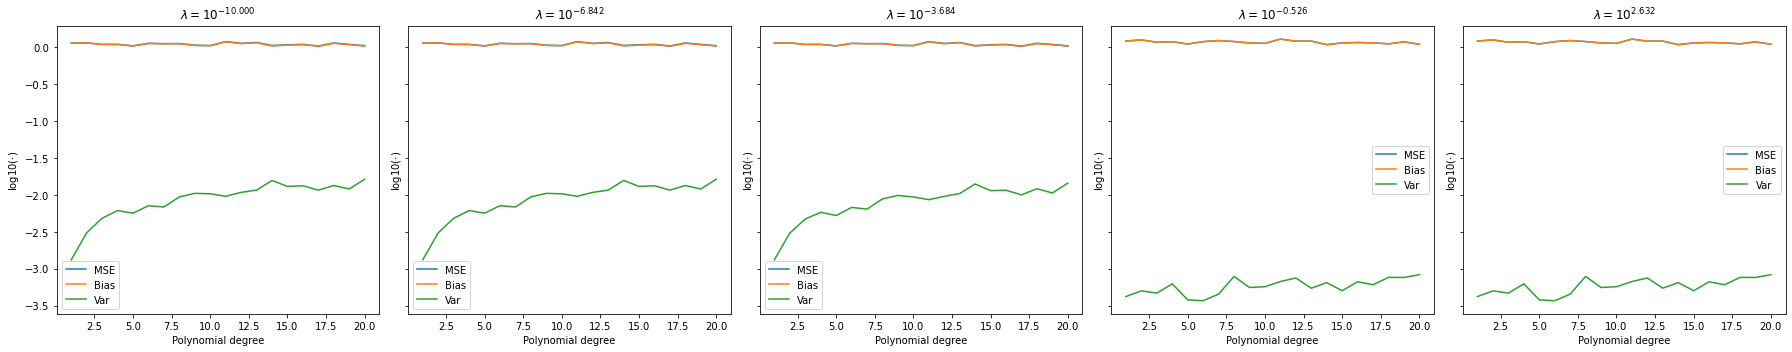

In [103]:
fig, axs = plt.subplots(1,5, figsize=(25,5), sharey=True)
ps = np.arange(model_complexity)+1
j = 0
for i in [0,4,8,12,16]:
    if lambdas[i] == 0:
        axs[j].set_title("$\\lambda = 0$")
    else:
        axs[j].set_title("$\\lambda = 10^{%.3f}$"%np.log10(lambdas[i]))
    axs[j].plot(ps, np.log10(mses_test[:,i]), label="MSE")
    axs[j].plot(ps, np.log10(bias_test[:,i]), label="Bias")
    axs[j].plot(ps, np.log10(var_test[:,i]), label="Var")
    j+=1
[ax.set_ylabel("log10($\\cdot$)") for ax in axs]
[ax.set_xlabel("Polynomial degree") for ax in axs]
[ax.legend() for ax in axs]
fig.tight_layout()

## CV MSE analysis

In [104]:
from sklearn import linear_model
import project1.project1; import importlib; importlib.reload(project1.project1); from project1.project1 import *
k = 5

mses_train, var_train, bias_train = np.zeros((model_complexity,len(lambdas))), np.zeros((model_complexity,len(lambdas))),np.zeros((model_complexity, len(lambdas)))
mses_test, var_test, bias_test = np.zeros((model_complexity,len(lambdas))), np.zeros((model_complexity, len(lambdas))),np.zeros((model_complexity,len(lambdas)))
for p in range(1, model_complexity+1):
    print(p)
    #X = make_design_matrix(xvec = xvec, p = p)
    X = create_X(x = x, y=y, n = p)
    splits = kfold(data=znoisy, k=k, random_state = 3155)
    for i in range(len(lambdas)):
        
        ztrain, ztest, ztilde_train, ztilde_test = cross_validation(data = znoisy, splits = splits, 
                                                                    xvec = xvec, k = k, p = p, 
                                                                    method = "lasso", lmbda = lambdas[i], 
                                                                    scale_centering=True)
        #computing the metrics
        mses_train[p-1,i] = np.nanmean((ztrain - ztilde_train)**2)
        bias_train[p-1,i] = np.nanmean((ztrain - np.nanmean(ztilde_train, axis=1, keepdims=True))**2)
        var_train[p-1,i] = np.nanmean(np.nanvar(ztilde_train, axis=1))
        
        mses_test[p-1,i] = np.nanmean((ztest - ztilde_test)**2)
        bias_test[p-1,i] = np.nanmean((ztest - np.nanmean(ztilde_test, axis=1, keepdims=True))**2)
        var_test[p-1,i] = np.nanmean(np.nanvar(ztilde_test, axis=1))


1
2
3


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.035e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.090e+03, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.030e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.083e+00, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.033e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(


4


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+03, tolerance: 2.271e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.027e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

5


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.032e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.074e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.084e+03, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.027e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e+01, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(


6


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.030e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.084e+03, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.027e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

7


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.028e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.071e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e+03, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.025e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

8


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.028e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.070e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+03, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.023e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.121e+00, tolerance: 2.271e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.039e+01, tolerance: 2.307e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

9


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.028e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.070e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+03, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.023e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.444e+00, tolerance: 2.271e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.227e-01, tolerance: 2.307e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

10


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.027e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e+03, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.023e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.142e+00, tolerance: 2.271e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.033e+00, tolerance: 2.307e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

11


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.027e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e+03, tolerance: 2.307e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e+03, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.233e+00, tolerance: 2.271e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.940e+01, tolerance: 2.307e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

12


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.026e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.042e+03, tolerance: 2.307e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.080e+03, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.076e+01, tolerance: 2.271e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.630e+01, tolerance: 2.307e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

13


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.025e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.067e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.042e+03, tolerance: 2.307e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.078e+03, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.639e+00, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+01, tolerance: 2.271e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

14


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.067e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.041e+03, tolerance: 2.307e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e+03, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.432e+00, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.407e+01, tolerance: 2.271e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

15


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.023e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.041e+03, tolerance: 2.307e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.076e+03, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.003e+00, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+01, tolerance: 2.271e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

16


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.023e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.041e+03, tolerance: 2.307e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+03, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.265e+01, tolerance: 2.271e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.510e+01, tolerance: 2.307e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

17


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.065e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+03, tolerance: 2.307e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.073e+03, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.210e+00, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.032e+01, tolerance: 2.271e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

18


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.021e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.064e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.039e+03, tolerance: 2.307e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e+03, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.633e+00, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.072e+01, tolerance: 2.271e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

19


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.020e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.064e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.039e+03, tolerance: 2.307e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.071e+03, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.706e+00, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.786e+01, tolerance: 2.271e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

20


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.020e+03, tolerance: 2.254e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.063e+03, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.038e+03, tolerance: 2.307e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.070e+03, tolerance: 2.369e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.992e+00, tolerance: 2.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.150e+01, tolerance: 2.271e-01
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

[Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0.5, 0, '$\\lambda$')]

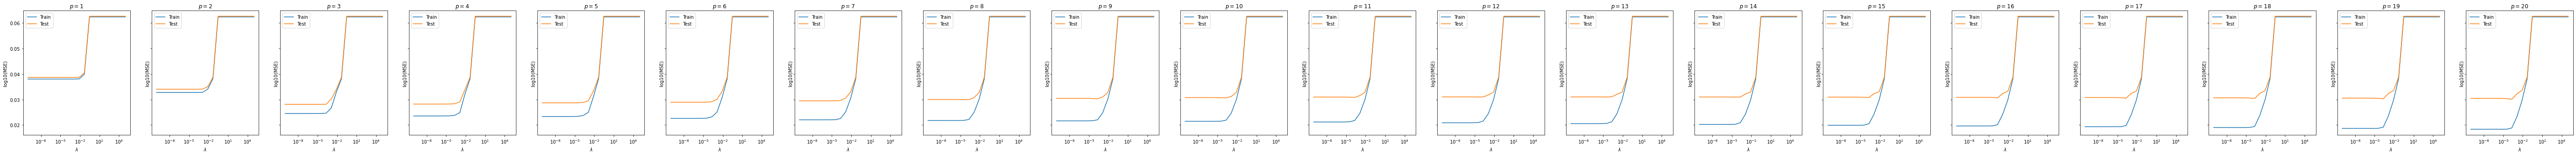

In [105]:
fig, axs = plt.subplots(1,model_complexity,figsize=(model_complexity*5,5), sharey=True)
for p in range(model_complexity):
    axs[p].set_title("$p=%i$"%(p+1))
    axs[p].plot(lambdas, np.log10(mses_train[p]), label="Train")
    axs[p].plot(lambdas, np.log10(mses_test[p]), label="Test") 
[ax.set_xscale('log') for ax in axs]
[ax.legend() for ax in axs]
[ax.set_ylabel("log10(MSE)") for ax in axs]
[ax.set_xlabel("$\\lambda$") for ax in axs]

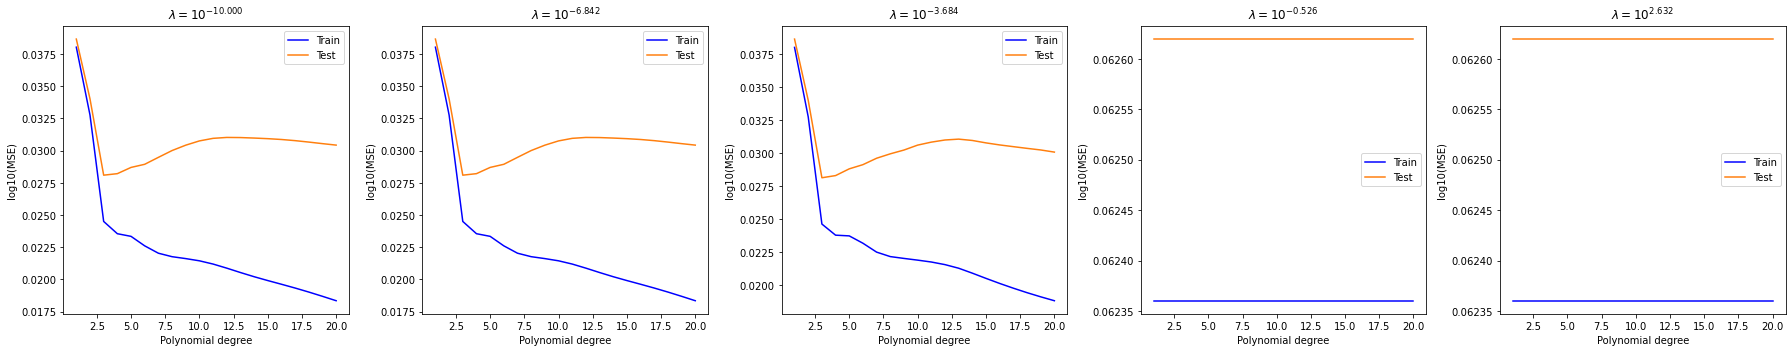

In [106]:
fig, axs = plt.subplots(1,5, figsize=(25,5))#, sharey=True)
ps = np.arange(model_complexity)+1

j = 0
for i in [0,4,8,12,16]:
    if lambdas[i] == 0:
        axs[j].set_title("$\\lambda = 0$")
    else:
        axs[j].set_title("$\\lambda = 10^{%.3f}$"%np.log10(lambdas[i]))
    axs[j].plot(ps, np.log10(mses_train[:,i]), label="Train", color='b')
    axs[j].plot(ps, np.log10(mses_test[:,i]), label="Test", color = 'C1')
    j+=1
[ax.set_ylabel("log10(MSE)") for ax in axs]
[ax.set_xlabel("Polynomial degree") for ax in axs]
[ax.legend() for ax in axs]
fig.tight_layout()

# Real data 
# g)

### plot example

[None, None]

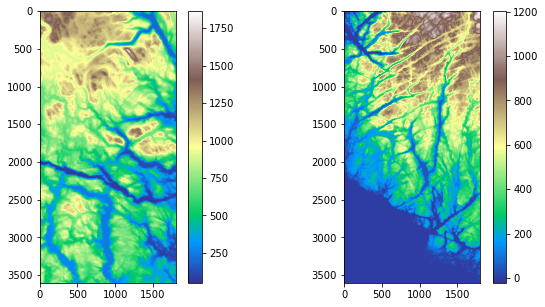

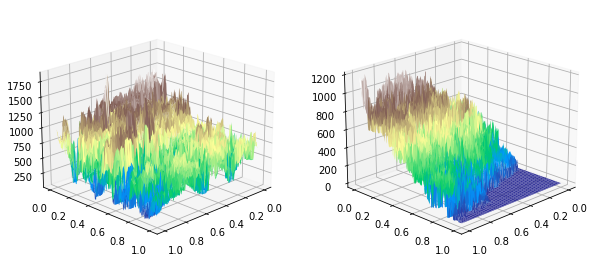

In [220]:
%matplotlib inline
from imageio import imread
datadir = "~/cs/ada_ml/ada_ml_project1/datafiles"
terrain1 = np.array(imread(datadir + "/SRTM_data_Norway_1.tif"))
terrain2 = np.array(imread(datadir + "/SRTM_data_Norway_2.tif"))
fig, axs = plt.subplots(1,2, figsize = (10,5))
fig_3d, axs_3d = plt.subplots(1,2, subplot_kw={'projection':'3d'}, figsize = (10,5))
im1 = axs[0].imshow(terrain1, cmap = plt.cm.terrain)
im2 = axs[1].imshow(terrain2, cmap = plt.cm.terrain)
cbar1 = fig.colorbar(im1, ax = axs[0])
cbar2 = fig.colorbar(im2, ax = axs[1])
x1, y1 = np.meshgrid(np.linspace(0,1, terrain1.shape[1]), np.linspace(0,1, terrain1.shape[0]) )
x2, y2 = np.meshgrid(np.linspace(0,1, terrain2.shape[1]), np.linspace(0,1, terrain2.shape[0]) )
axs_3d[0].plot_surface(x1, y1, terrain1, cmap =plt.cm.terrain)
axs_3d[1].plot_surface(x2, y2, terrain2, cmap =plt.cm.terrain)
[ax.view_init(20,45) for ax in axs_3d]

## Test OLS
- with scaling and centering

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
p = 10
xvec = np.array([x1,y1])

#X = make_design_matrix(xvec = xvec, p = p)
X = create_X(x = x1, y=y1, n = p)[:,1:]
Xtrain, Xtest, ztrain, ztest = train_test_split(X, terrain1.ravel(), **{'random_state' : 3155, 'test_size' : 0.3})
Xtrain_scaled_centered = (Xtrain - np.mean(Xtrain,axis=0))/np.std(Xtrain,axis=1)
Xtest_scaled_centered = (Xtest - np.mean(Xtrain,axis=0))/np.std(Xtrain,axis=1)
ztilde_train, betahat = ols_fp_wo_split(X=Xtrain_scaled_centered, y=ztrain-np.mean(ztrain))
ztilde_train += np.mean(ztrain)
ztilde_test = Xtest_scaled_centered@betahat + np.mean(ztrain)

In [ ]:
fig_3d, axs_3d = plt.subplots(1,2, subplot_kw={'projection':'3d'}, figsize = (10,5))
axs_3d[0].scatter(Xtrain[:,0][::100], 
                  Xtrain[:,1][::100], 
                  ztilde_train[::100], 
                  c=ztilde_train[::100], cmap = plt.cm.terrain)
axs_3d[1].scatter(Xtest[:,0][::100], 
                  Xtest[:,1][::100], 
                  ztilde_test[::100], 
                  c = ztilde_test[::100], cmap = plt.cm.terrain)
axs_3d[0].plot_surface(x1, y1, terrain1, cmap =plt.cm.terrain)
axs_3d[1].plot_surface(x1, y1, terrain1, cmap =plt.cm.terrain)
[ax.view_init(20,45) for ax in axs_3d]

In [236]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
p = 15
xvec = np.array([x1,y1])

#X = make_design_matrix(xvec = xvec, p = p)
X = create_X(x = x2, y=y2, n = p)[:,1:]
Xtrain, Xtest, ztrain, ztest = train_test_split(X, terrain2.ravel(), **{'random_state' : 3155, 'test_size' : 0.3})
Xtrain_scaled_centered = (Xtrain - np.mean(Xtrain,axis=0))/np.std(Xtrain,axis=0)
Xtest_scaled_centered = (Xtest - np.mean(Xtrain,axis=0))/np.std(Xtrain,axis=0)
ztilde_train, betahat = ols_fp_wo_split(X=Xtrain_scaled_centered, y=ztrain-np.mean(ztrain))
ztilde_train += np.mean(ztrain)
ztilde_test = Xtest_scaled_centered@betahat + np.mean(ztrain)

[None, None]

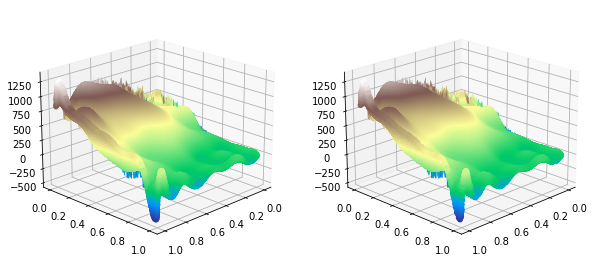

In [237]:
fig_3d, axs_3d = plt.subplots(1,2, subplot_kw={'projection':'3d'}, figsize = (10,5))
axs_3d[0].scatter(Xtrain[:,0][::10], 
                  Xtrain[:,1][::10], 
                  ztilde_train[::10], 
                  c=ztilde_train[::10], cmap = plt.cm.terrain)
axs_3d[1].scatter(Xtest[:,0][::10], 
                  Xtest[:,1][::10], 
                  ztilde_test[::10], 
                  c = ztilde_test[::10], cmap = plt.cm.terrain)
axs_3d[0].plot_surface(x2, y2, terrain2, cmap = plt.cm.terrain)
axs_3d[1].plot_surface(x2, y2, terrain2, cmap = plt.cm.terrain)
[ax.view_init(20,45) for ax in axs_3d]

(array([5.40000e+01, 3.20000e+02, 5.40000e+02, 2.18800e+03, 3.49000e+03,
        5.99900e+03, 9.47800e+03, 1.05040e+04, 1.36610e+04, 2.05690e+04,
        3.15130e+04, 4.74260e+04, 5.73200e+04, 8.79350e+04, 1.32248e+05,
        2.21789e+05, 3.11499e+05, 3.17148e+05, 2.18774e+05, 1.70756e+05,
        1.19837e+05, 8.02370e+04, 4.26250e+04, 2.12500e+04, 1.01930e+04,
        5.17900e+03, 2.01100e+03, 7.79000e+02, 2.80000e+02, 1.90000e+01]),
 array([-638.66843058, -600.80042994, -562.9324293 , -525.06442866,
        -487.19642802, -449.32842738, -411.46042674, -373.5924261 ,
        -335.72442546, -297.85642482, -259.98842417, -222.12042353,
        -184.25242289, -146.38442225, -108.51642161,  -70.64842097,
         -32.78042033,    5.08758031,   42.95558095,   80.82358159,
         118.69158224,  156.55958288,  194.42758352,  232.29558416,
         270.1635848 ,  308.03158544,  345.89958608,  383.76758672,
         421.63558736,  459.503588  ,  497.37158864]),
 <BarContainer object of 30 a

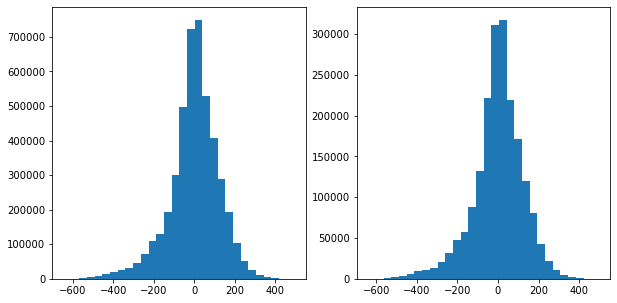

In [238]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].hist(ztrain-ztilde_train, bins=30)
axs[1].hist(ztest-ztilde_test, bins=30)

[None, None]

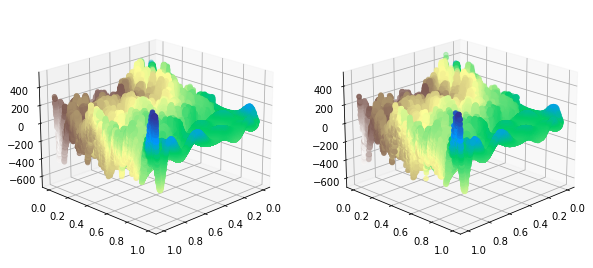

In [239]:
fig_3d, axs_3d = plt.subplots(1,2, subplot_kw={'projection':'3d'}, figsize = (10,5))
axs_3d[0].scatter(Xtrain[:,0][::10], 
                  Xtrain[:,1][::10], 
                  ztrain[::10]-ztilde_train[::10], 
                  c=ztilde_train[::10], cmap = plt.cm.terrain)
axs_3d[1].scatter(Xtest[:,0][::10], 
                  Xtest[:,1][::10], 
                  ztest[::10]-ztilde_test[::10], 
                  c = ztilde_test[::10], cmap = plt.cm.terrain)
[ax.view_init(20,45) for ax in axs_3d]

## Bias-variance trade-off analysis
1. OLS
2. Ridge
3. Lasso

with bootstrap and cross-validation in order to make a full comparison

### OLS bootstrap

In [244]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 5
B = 100
xvec = np.array([x1,y1])

mses_train_ols, var_train_ols, bias_train_ols = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity)) 
mses_test_ols, var_test_ols, bias_test_ols = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity))
for p in range(1,model_complexity+1):
    print(p)
    #X = make_design_matrix(xvec = xvec, p = p)
    X = create_X(x = x1, y=y1, n = p)[:,1:]
    Xtrain, Xtest, ztrain, ztest = train_test_split(X, terrain1.ravel(), 
                                                    **{'random_state' : 3155, 'test_size' : 0.2})
    ztilde_train = np.zeros((ztrain.shape[0], B))
    ztilde_test = np.zeros((ztest.shape[0], B))
    for ik in range(B):
        # resample training data
        z_resampled, Xtrain_resampled = resample(data = ztrain, design_matrix = Xtrain)
        # center the data
        Xtrain_resampled_scaled_centered = (Xtrain_resampled - np.mean(Xtrain_resampled, axis=0))/np.std(Xtrain_resampled, axis=0)
        Xtest_scaled_centered = (Xtest - np.mean(Xtrain_resampled,axis=0))/np.std(Xtrain_resampled, axis=0)
        ztilde_train[:,ik], betahat = ols_fp_wo_split(X = Xtrain_resampled_scaled_centered, 
                                                      y = z_resampled-np.mean(z_resampled))
        # add mean of the training data
        ztilde_train[:,ik] += np.mean(z_resampled)
        # compute centered prediction and add mean of training data
        ztilde_test[:,ik] = Xtest_scaled_centered@betahat + np.mean(z_resampled)
        
    # compute mse, bias and variance for training and test set
    mses_train_ols[p-1] = MSE( y = ztrain, ytilde = ztilde_train)
    bias_train_ols[p-1] = np.nanmean((ztrain - np.nanmean(ztilde_train, axis=1))**2)
    var_train_ols[p-1] = np.nanmean(np.var(ztilde_train, axis=1))

    mses_test_ols[p-1] = MSE(y = ztest ,ytilde = ztilde_test)
    bias_test_ols[p-1] = np.nanmean((ztest - np.nanmean(ztilde_test, axis=1))**2)
    var_test_ols[p-1] = np.nanmean(np.var(ztilde_test, axis=1))

1
2
3
4
5


/tmp/ipykernel_17593/2306578865.py:4: RuntimeWarning: divide by zero encountered in log10
  ax.plot(ps, np.log10(mses_test_ols), label="MSE Test" )
/tmp/ipykernel_17593/2306578865.py:5: RuntimeWarning: divide by zero encountered in log10
  ax.plot(ps, np.log10(bias_test_ols), label="Bias Test",         marker = 'x')
/tmp/ipykernel_17593/2306578865.py:6: RuntimeWarning: divide by zero encountered in log10
  ax.plot(ps, np.log10(var_test_ols),  label="$\\sigma^2$ Test",  marker = '^')


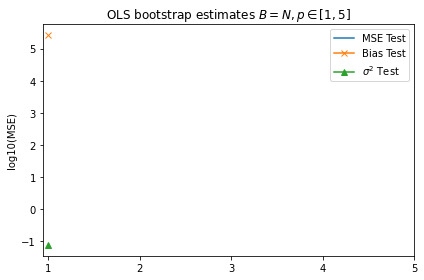

In [243]:
fig, ax = plt.subplots(1,1)
ps = np.arange(model_complexity)+1
ax.set_title("OLS bootstrap estimates $B=N, p\\in[%i,%i]$"%(ps[0], ps[-1]))
ax.plot(ps, np.log10(mses_test_ols), label="MSE Test" ) 
ax.plot(ps, np.log10(bias_test_ols), label="Bias Test",         marker = 'x') 
ax.plot(ps, np.log10(var_test_ols),  label="$\\sigma^2$ Test",  marker = '^') 
ax.legend()
ax.set_ylabel("log10(MSE)")
ax.set_xticks(ps, ps)
fig.tight_layout()
fig.savefig(os.getcwd() + "/figs/partG/OLS_bootstrap_k%i_p%i_terrain1_bias_var_tradeoff.png"%(k, ps[-1]), dpi=150)

## For profiling

In [ ]:
%load_ext line_profiler

# CV OLS

### OLS cross validation

In [132]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 10
xvec = np.array([x1,y1])
k = 5
splits = kfold(data=terrain1, k=k, random_state = 3155)
mses_train_ols, var_train_ols, bias_train_ols = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity))
mses_test_ols,  var_test_ols,  bias_test_ols = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity))
for p in range(1,model_complexity+1):
    print(p)
    ztrain, ztest, ztilde_train, ztilde_test = cross_validation(data = terrain1, splits=splits, xvec = xvec,k = k, p = p,method = "ols")
    #computing the metrics
    mses_train_ols[p-1] = np.nanmean((ztrain - ztilde_train)**2)
    bias_train_ols[p-1] = np.nanmean((ztrain - np.nanmean(ztilde_train, axis=1))**2)
    var_train_ols[p-1] = np.nanmean(np.var(ztilde_train, axis=1))

    mses_test_ols[p-1] = np.nanmean((ztest - ztilde_test)**2)
    bias_test_ols[p-1] = np.nanmean((ztest - np.nanmean(ztilde_test, axis=1))**2)
    var_test_ols[p-1] = np.nanmean(np.nanvar(ztilde_test, axis=1))

1


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


2
3
4
5
6
7
8
9
10


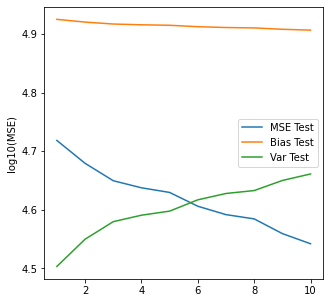

In [174]:
fig, ax = plt.subplots(1,1,figsize=(5,5), sharey=True)
ps = np.arange(model_complexity) + 1
ax.plot(ps, np.log10(mses_test_ols), label="MSE Test") 
ax.plot(ps, np.log10(bias_test_ols), label="Bias Test") 
ax.plot(ps, np.log10(var_test_ols), label="Var Test") 
ax.legend()
ax.set_ylabel("log10(MSE)")
fig.savefig(os.getcwd() + "/figs/partG/OLS_cv_k%i_p%i_terrain1_bias_var_tradeoff.png"%(k, ps[-1]), dpi=150)

## Ridge CV

In [143]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 10
xvec = np.array([x1,y1])
# generate split indices
k = 5
splits = kfold(data=terrain1, k=k, random_state = 3155)

lambdas = np.logspace(-5,5, 10)
ll = len(lambdas)
mses_train_ridge, var_train_ridge, bias_train_ridge = np.zeros((model_complexity, ll)), np.zeros((model_complexity, ll)),np.zeros((model_complexity,ll))
mses_test_ridge, var_test_ridge, bias_test_ridge = np.zeros((model_complexity,ll)), np.zeros((model_complexity,ll)),np.zeros((model_complexity,ll))
for p in range(1,model_complexity+1):
    print(p)
    for i in range(len(lambdas)):
        print(p, i)
        ztrain, ztest, ztilde_train, ztilde_test = cross_validation(data = terrain1, splits=splits, 
                                                                    xvec = xvec,k = k, p = p,
                                                                    method = "ridge", 
                                                                    lmbda = lambdas[i])
        #computing the metrics
        mses_train_ridge[p-1, i] = np.nanmean((ztrain - ztilde_train)**2)
        bias_train_ridge[p-1, i] = np.nanmean((ztrain - np.nanmean(ztilde_train, axis=1, keepdims=True))**2)
        var_train_ridge[p-1, i] = np.nanmean(np.var(ztilde_train, axis=1))

        mses_test_ridge[p-1, i] = np.nanmean((ztest - ztilde_test)**2)
        bias_test_ridge[p-1, i] = np.nanmean((ztest - np.mean(ztilde_test, axis=1, keepdims=True))**2)
        var_test_ridge[p-1, i] = np.nanmean(np.nanvar(ztilde_test, axis=1))

1
1 0


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
9
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
10
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9


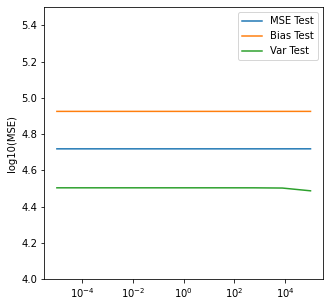

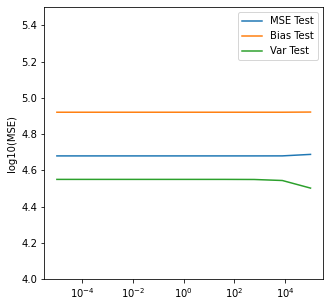

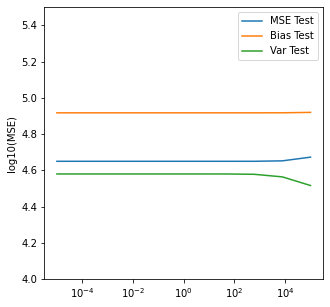

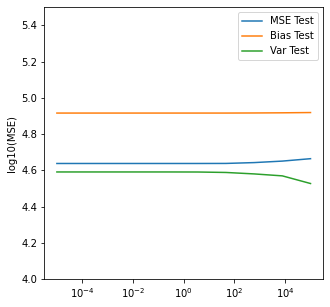

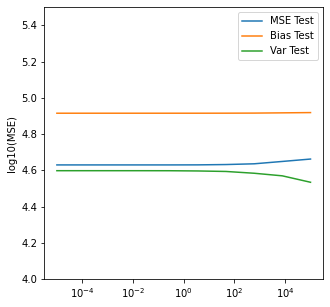

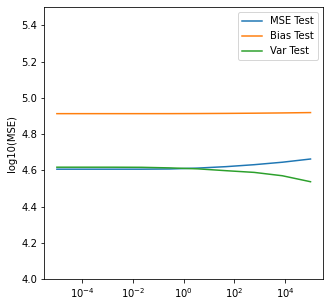

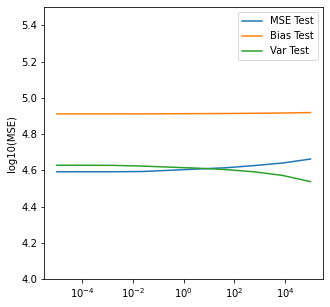

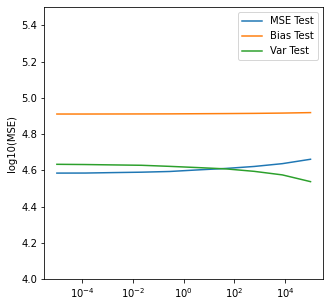

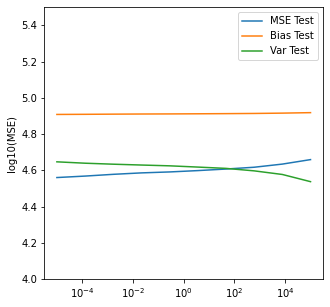

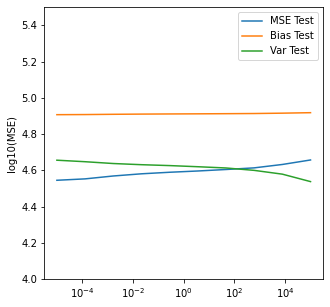

In [165]:
import os
for i in range(model_complexity):
    fig, ax = plt.subplots(1,1,figsize=(5,5), sharey=True)
    #ax.plot(lambdas, np.log10(mses_train_ridge[i]), ls = '--', label="MSE Train")
    ax.plot(lambdas, np.log10(mses_test_ridge[i]), label="MSE Test") 
    #ax.plot(lambdas, np.log10(bias_train_ridge[i]), ls = '--', label="Bias Train")
    ax.plot(lambdas, np.log10(bias_test_ridge[i]), label="Bias Test") 
    #ax.plot(lambdas, np.log10(var_train_ridge[i]), ls = '--', label="Var Train")
    ax.plot(lambdas, np.log10(var_test_ridge[i]), label="Var Test") 
    ax.set_xscale('log')
    ax.legend()
    ax.set_ylabel("log10(MSE)")
    ax.set_ylim(4,5.5)
    fig.savefig(os.getcwd() + "/figs/partG/ridge_cv_k%i_p%i_terrain1.png"%(k,i), dpi=150)

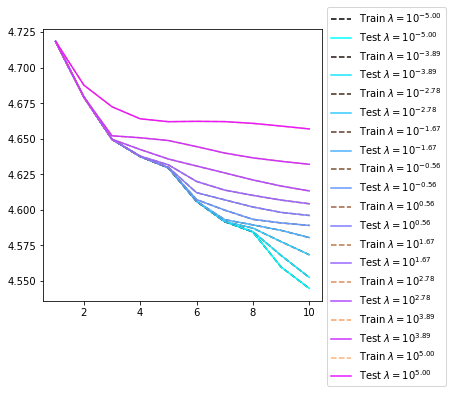

In [167]:
fig, ax = plt.subplots(1,1,figsize=(5,5), sharey=True)
ps = np.arange(model_complexity) + 1
carr = np.arange(len(lambdas))/len(lambdas)
cs_train = plt.cm.copper(carr)
cs_test = plt.cm.cool(carr)
for i in range(len(lambdas)):
    ax.plot(ps, np.log10(mses_train_ridge[:,i]), 
            ls = '--', color = cs_train[i],
            label="Train $\\lambda = 10^{%.2f}$"%np.log10(lambdas[i]))
    ax.plot(ps, np.log10(mses_test_ridge[:,i]), color = cs_test[i],
            label="Test $\\lambda = 10^{%.2f}$"%np.log10(lambdas[i])) 
ax.legend(bbox_to_anchor=(1,.5,.2,.6))
fig.savefig(os.getcwd() + "/figs/partG/ridge_cv_k%i_p10_terrain1.png"%(k), dpi=150)

# Lasso CV

In [146]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 5
xvec = np.array([x1,y1])
k = 5
splits = kfold(data=terrain1, k=k, random_state = 3155)
mses_train_lasso, var_train_lasso, bias_train_lasso = np.zeros((model_complexity,ll)), np.zeros((model_complexity,ll)),np.zeros((model_complexity,ll))
mses_test_lasso, var_test_lasso, bias_test_lasso = np.zeros((model_complexity, ll)), np.zeros((model_complexity,ll)),np.zeros((model_complexity,ll))
for p in range(1,model_complexity+1):
    print(p)
    for i in range(len(lambdas)):
        print(p, i)
        ztrain, ztest, ztilde_train, ztilde_test = cross_validation(data = terrain1, 
                                                                    splits = splits, 
                                                                    xvec = xvec, 
                                                                    k = k, p = p, 
                                                                    method = "lasso", 
                                                                    lmbda = lambdas[i])
        #computing the metrics
        mses_train_lasso[p-1, i] = np.nanmean((ztrain - ztilde_train)**2)
        bias_train_lasso[p-1, i] = np.nanmean((ztrain - np.nanmean(ztilde_train, axis=1, keepdims=True))**2)
        var_train_lasso[p-1, i] = np.nanmean(np.var(ztilde_train, axis=1))

        mses_test_lasso[p-1, i] = np.nanmean((ztest - ztilde_test)**2)
        bias_test_lasso[p-1, i] = np.nanmean((ztest - np.nanmean(ztilde_test, axis=1, keepdims=True))**2)
        var_test_lasso[p-1, i] = np.nanmean(np.nanvar(ztilde_test, axis=1))

1
1 0


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

1 1


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

1 2


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

1 3


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

1 4


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

1 5


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

1 6


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

1 7


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

1 8


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

1 9


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

2
2 0


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

2 1


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

2 2


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

2 3


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

2 4


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

2 5


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

2 6


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

2 7


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

2 8


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

2 9


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

3
3 0


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.158e+11, tolerance: 4.780e+07
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecate

3 1


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.154e+11, tolerance: 4.780e+07
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecate

3 2


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.106e+11, tolerance: 4.780e+07
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecate

3 3


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.327e+10, tolerance: 4.780e+07
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecate

3 4


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.138e+09, tolerance: 4.780e+07
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecate

3 5


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

3 6


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

3 7


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

3 8


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

3 9


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

4
4 0


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.149e+11, tolerance: 4.780e+07
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecate

4 1


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.148e+11, tolerance: 4.780e+07
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecate

4 2


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.131e+11, tolerance: 4.780e+07
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecate

4 3


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.196e+10, tolerance: 4.780e+07
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecate

4 4


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.919e+09, tolerance: 4.780e+07
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecate

4 5


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

4 6


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

4 7


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

4 8


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

4 9


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

5
5 0


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.138e+11, tolerance: 4.780e+07
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecate

5 1


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+11, tolerance: 4.780e+07
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecate

5 2


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+11, tolerance: 4.780e+07
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecate

5 3


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.366e+10, tolerance: 4.780e+07
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecate

5 4


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.841e+09, tolerance: 4.780e+07
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecate

5 5


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

5 6


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

5 7


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

5 8


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

5 9


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

6
6 0


/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.126e+11, tolerance: 4.780e+07
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecate

KeyboardInterrupt: 

/tmp/ipykernel_17593/208287126.py:10: RuntimeWarning: divide by zero encountered in log10
  axs[i].plot(ps, np.log10(mses_train_lasso[:,i*2]),  label="MSE train", color = 'b')
/tmp/ipykernel_17593/208287126.py:11: RuntimeWarning: divide by zero encountered in log10
  axs[i].plot(ps, np.log10(mses_test_lasso[:,i*2]),  label="MSE test",  color = 'b', ls='--')
/tmp/ipykernel_17593/208287126.py:12: RuntimeWarning: divide by zero encountered in log10
  axs[i].plot(ps, np.log10(bias_train_lasso[:,i*2]),  label="Bias train",color = 'C1')
/tmp/ipykernel_17593/208287126.py:13: RuntimeWarning: divide by zero encountered in log10
  axs[i].plot(ps, np.log10(bias_test_lasso[:,i*2]),  label="Bias test", color = 'C1', ls='--')
/tmp/ipykernel_17593/208287126.py:14: RuntimeWarning: divide by zero encountered in log10
  axs[i].plot(ps, np.log10(var_train_lasso[:,i*2]),  label="Var train", color = 'C2')
/tmp/ipykernel_17593/208287126.py:15: RuntimeWarning: divide by zero encountered in log10
  axs[i].plo

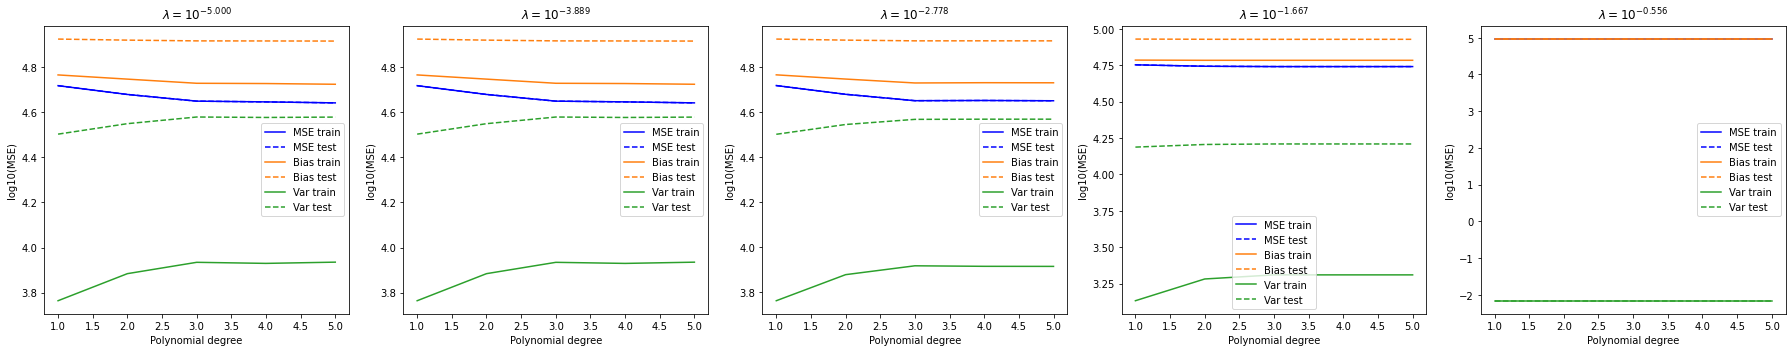

In [170]:
fig, axs = plt.subplots(1,ll//2, figsize=(ll//2*5,5))

ps = np.arange(model_complexity)+1

for i in range(len(lambdas)//2):
    if lambdas[i] == 0:
        axs[i].set_title("$\\lambda = 0$")
    else:    
        axs[i].set_title("$\\lambda = 10^{%.3f}$"%np.log10(lambdas[i]))
    axs[i].plot(ps, np.log10(mses_train_lasso[:,i*2]),  label="MSE train", color = 'b')
    axs[i].plot(ps, np.log10(mses_test_lasso[:,i*2]),  label="MSE test",  color = 'b', ls='--')
    axs[i].plot(ps, np.log10(bias_train_lasso[:,i*2]),  label="Bias train",color = 'C1')
    axs[i].plot(ps, np.log10(bias_test_lasso[:,i*2]),  label="Bias test", color = 'C1', ls='--')
    axs[i].plot(ps, np.log10(var_train_lasso[:,i*2]),  label="Var train", color = 'C2')
    axs[i].plot(ps, np.log10(var_test_lasso[:,i*2]),  label="Var test",  color = 'C2', ls='--')
[ax.set_ylabel("log10(MSE)") for ax in axs]
[ax.set_xlabel("Polynomial degree") for ax in axs]
[ax.legend() for ax in axs]
fig.tight_layout()
fig.savefig(os.getcwd() + "/figs/partG/lasso_cv_k%i_p%i_terrain1.png"%(k, ps[-1]), dpi=150)

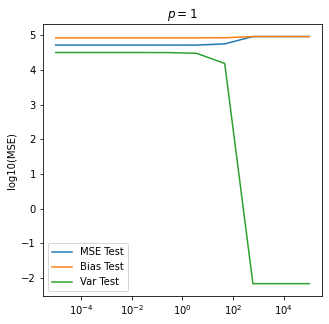

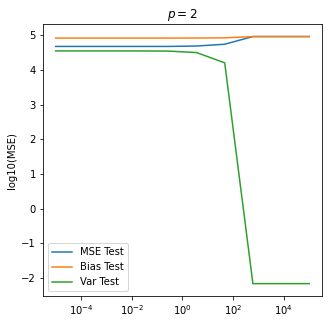

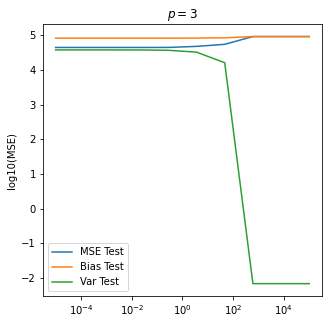

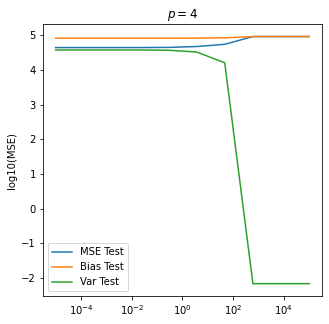

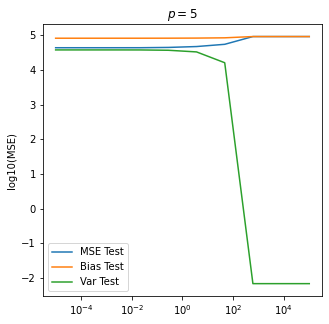

In [173]:
for i in range(5):
    fig, ax = plt.subplots(1,1,figsize=(5,5), sharey=True)
    ax.set_title("$p = %i$"%(i+1))
    #ax.plot(lambdas, np.log10(mses_train_lasso[i]), ls = '--', label="MSE Train")
    ax.plot(lambdas, np.log10(mses_test_lasso[i]), label="MSE Test") 
    #ax.plot(lambdas, np.log10(bias_train_lasso[i]), ls = '--', label="Bias Train")
    ax.plot(lambdas, np.log10(bias_test_lasso[i]), label="Bias Test") 
    #ax.plot(lambdas, np.log10(var_train_lasso[i]), ls = '--', label="Var Train")
    ax.plot(lambdas, np.log10(var_test_lasso[i]), label="Var Test") 
    ax.set_xscale('log')
    ax.legend()
    ax.set_ylabel("log10(MSE)")
    #ax.set_ylim(4,5.5)
    fig.savefig(os.getcwd() + "/figs/partG/lasso_cv_k%i_p%i_terrain1_bias_var_tradeoff.png"%(k, i), dpi=150)    